In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter


%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')



In [2]:

df=pd.read_csv('C:/Users/Vivek Vishan Jetani/Desktop/vivek.csv')
#print(df.head())
df.convert_objects(convert_numeric=True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    columns=df.columns.values
    
    for column in columns:
        text_digit_vals={}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype !=np.int64 and df[column].dtype !=np.float64:
            column_contents=df[column].values.tolist()
            unique_elements=set(column_contents)
            x=0

            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique]=x
                    x+=1
            df[column]=list(map(convert_to_int, df[column]))
    return df
df=handle_non_numerical_data(df)
print(df.head())


   gender  Category  SSC  HSC  classification  resource  place_of_study  \
0       0         1   70   65               1         3               2   
1       0         0   70   70               2         5               0   
2       0         0   70   65               2         3               2   
3       0         1   90   65               1         4               2   
4       0         0   90   90               0         5               2   

   attendance  self-study  GPA  
0        90.5           8  3.3  
1        70.5           8  3.3  
2        70.5           8  3.3  
3        90.5           3  3.8  
4        90.5           3  3.3  


C:\Users\Vivek Vishan Jetani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


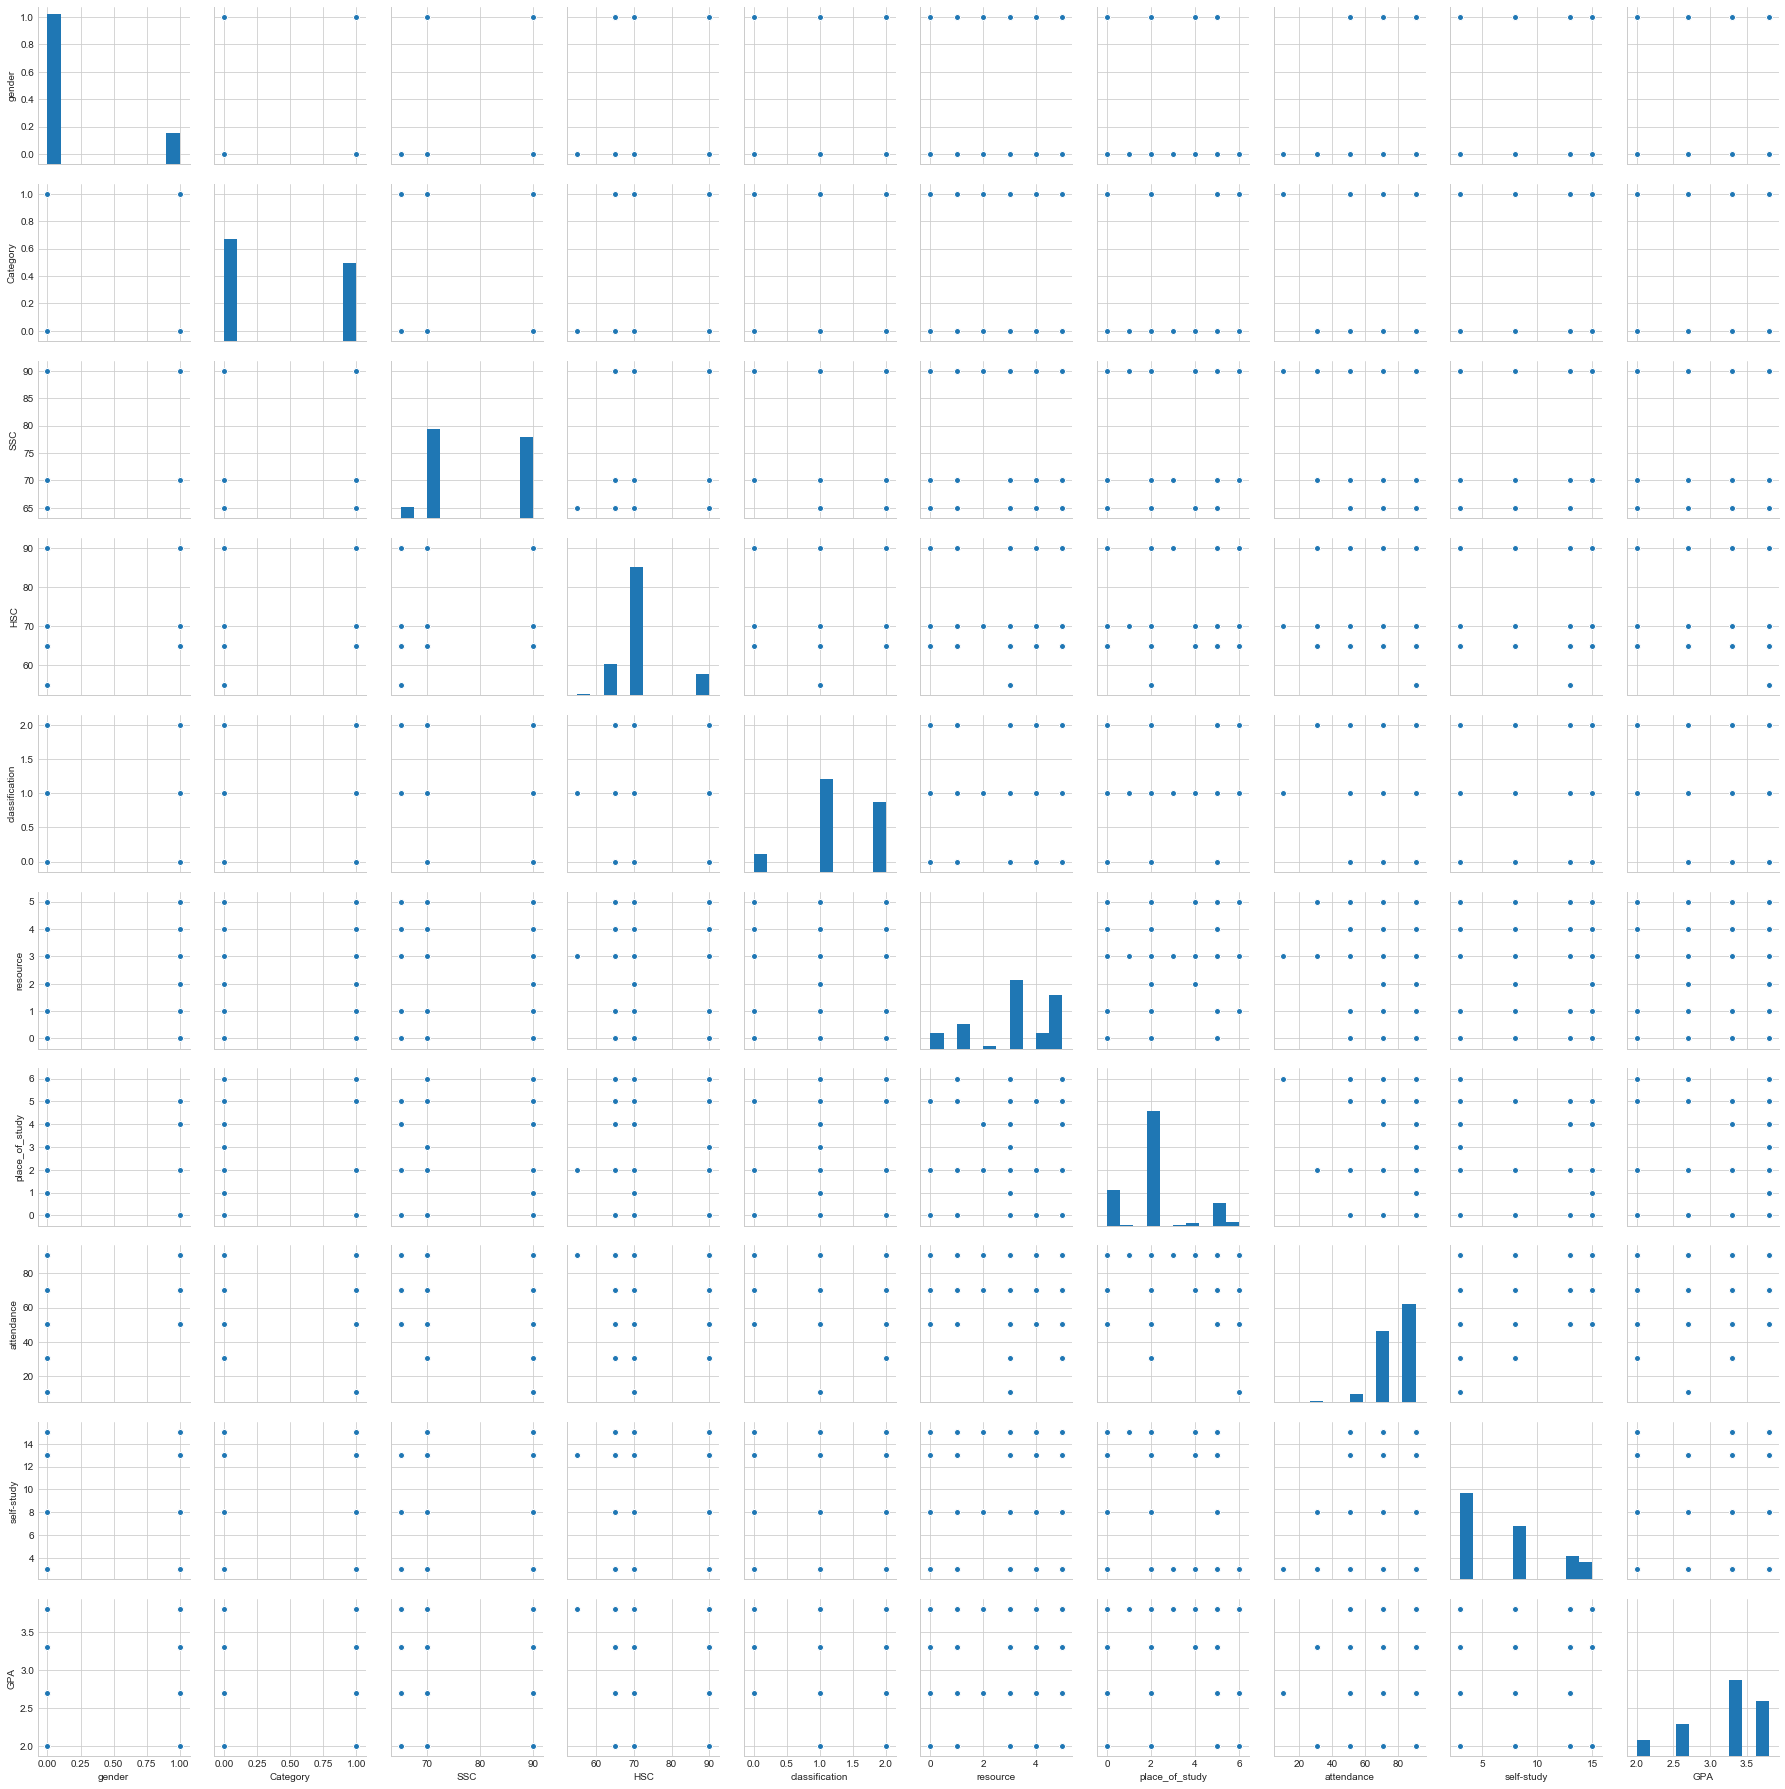

In [3]:
 
sb.pairplot(df)  

In [4]:
print (df.corr())
 

                  gender  Category       SSC       HSC  classification  \
gender          1.000000 -0.244540  0.163232  0.053902        0.089971   
Category       -0.244540  1.000000 -0.103475  0.115659        0.001734   
SSC             0.163232 -0.103475  1.000000  0.146367       -0.127207   
HSC             0.053902  0.115659  0.146367  1.000000       -0.009870   
classification  0.089971  0.001734 -0.127207 -0.009870        1.000000   
resource        0.021163 -0.123903 -0.129818 -0.057807       -0.085303   
place_of_study -0.053481  0.042152 -0.063049 -0.000803        0.056438   
attendance      0.042425 -0.049093  0.071666  0.017873       -0.140532   
self-study      0.167516 -0.060216 -0.033155  0.074147       -0.062791   
GPA             0.173072 -0.204338  0.153419 -0.002820       -0.114517   

                resource  place_of_study  attendance  self-study       GPA  
gender          0.021163       -0.053481    0.042425    0.167516  0.173072  
Category       -0.123903       

In [5]:
ie_data=df.ix[:,(0,1,2,3,4,5,6,7)].values
ie_target=df.ix[:,8].values
ie_data_names=['gender','category','SSC%','HSC%','classification','resource','place_of_study','attendance']
X,y=scale(ie_data),ie_target



C:\Users\Vivek Vishan Jetani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [6]:
missing_values=X==np.NAN
X[missing_values==True]


array([], dtype=float64)

In [2]:
LinReg=LinearRegression(normalize=True)
LinReg.fit(X,y)
print (LinReg.score(X,y))



NameError: name 'LinearRegression' is not defined